In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

## Exploring the Dataset


In [2]:
titanic_df= pd.read_csv("Data/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

After we checking the Dataset we notice that there are no relavent info. 

Info that may no bearing on whether the passenger survived the sinking of the Titanic 

In [5]:
titanic_df.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# Let's check how many missed Values in each column
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [7]:
titanic_df.dropna(inplace=True)

In [8]:
titanic_df[titanic_df.isnull().any(axis=1)].count()  , titanic_df.shape

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64,
 (712, 8))

In [9]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200



- The survived col is composed of just 0's and 1's 
    - 0 : for survived
    - 1 : for Non-survived
    - `mean` Value of around 0.4 indicates that only 40% of the passengers in our Datasets are Survived 

- We can Notice from the `min` value on `Age` col that there were childern aboard the titanic as well.
- ...etc

## Visualizing Relationships in the Data

In [10]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


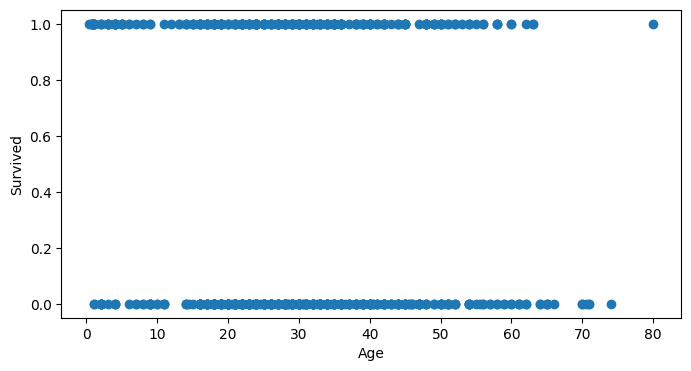

In [11]:
fig, ax= plt.subplots(figsize=(8,4))

plt.scatter(titanic_df["Age"],titanic_df["Survived"])
plt.xlabel("Age")
plt.ylabel("Survived");

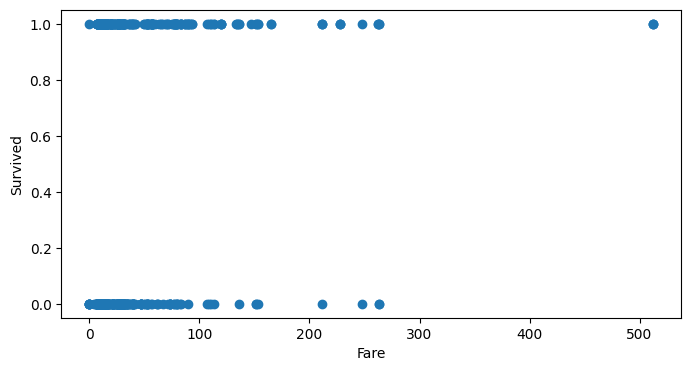

In [12]:
fig, ax= plt.subplots(figsize=(8,4))

plt.scatter(titanic_df["Fare"],titanic_df["Survived"])
plt.xlabel("Fare")
plt.ylabel("Survived");

Yes as you think, there are an unlovly outliers


In [13]:
pd.crosstab(titanic_df["Sex"],titanic_df["Survived"])

Survived,0,1
Sex,,
female,64,195
male,360,93


I think feminists are happy now

In [14]:
pd.crosstab(titanic_df["Pclass"],titanic_df["Survived"])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


- When we are working with multiple Features to train your Ml model, 

    it's quite possible that the features themselves have some kind
    
    of interrelationship; they me be correlated

- Correlation is a number between -1 to 1 which indicate the relationship betwween 2 variables

In [15]:
titanic_data_corr= titanic_df.corr(numeric_only=True)
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [16]:
# Let's try some visualization
fig = px.imshow(titanic_data_corr, text_auto=True,width=800,height=600)
fig.show()

# we can also use heatmap in seaborn

## Processing The Data

let't convert Categorical Values into Numeric

In [ ]:
from sklearn import preprocessing
label_encoding= preprocessing.LabelEncoder()
titanic_df["Sex"]=label_encoding.fit_transform(titanic_df["Sex"].astype(str))
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,Q
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
889,1,1,1,26.0,0,0,30.0000,C


In [18]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

**C = Cherbourg,  Q = Queenstown,  S = Southampton**

In [19]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


In [20]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,2,0,17.0,0,0,12.0000,True,False,False
1,0,1,1,36.0,1,0,78.8500,False,False,True
2,0,3,0,14.5,1,0,14.4542,True,False,False
3,1,2,0,42.0,0,0,13.0000,False,False,True
4,1,2,0,41.0,0,1,19.5000,False,False,True


In [21]:
titanic_df.to_csv('Data/titanic_processed.csv', index=False)